# Chapter 04: Feed Forward Networks

## MLPs

In [1]:
import torch.nn as nn
import torch.nn.functional as F

class MultiLayerPerceptron(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MultiLayerPerceptron, self).__init__()
        
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x_in, apply_softmax=False):
        """
        Forward pass of MLP
        
        Arguments:
        ----------
        
        x_in: torch.Tensor
            Should be shape (batch, input_dim)
            
        apply_softmax: Boolean (default false)
            Flag for softmax activation
            
            Should be false if applying cross-entropy losses
        
        Returns:
        --------
            Resulting tensor of shape (batch, output_dim)
        """
        
        interm = F.relu(self.fc1(x_in))
        output = self.fc2(interm)
        
        if apply_softmax:
            output = F.sigmoid(output, dim=1)
        return output

## Testing

In [2]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns

t = torch.arange(-10, 10, 0.01)


plt.plot(t.numpy(), (torch.sin(t) / t).numpy())

In [3]:
import numpy as np


X = torch.randn((100000, 2))
X[:, 0] = 5 * X[:, 0] 
y = X[:, 1] > torch.sin(X[:, 0])



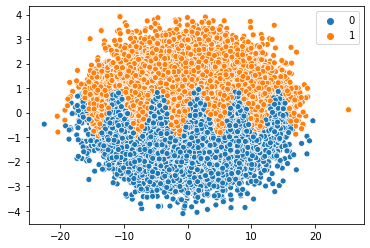

In [4]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [5]:
from torch import optim

clf = MultiLayerPerceptron(2, 1000, 1)
loss_func = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(clf.parameters(), lr=0.001)

In [6]:
def get_batch(batch_size):
    perm = torch.randperm(X.size(0))
    idx = perm[:batch_size]
    return X[idx], y[idx].float()

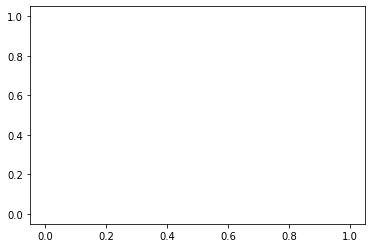

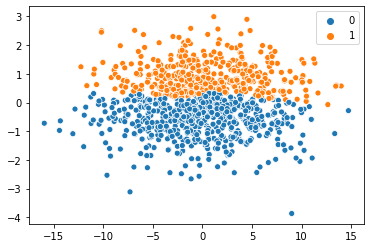

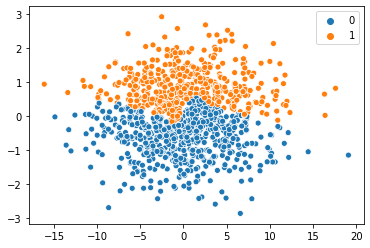

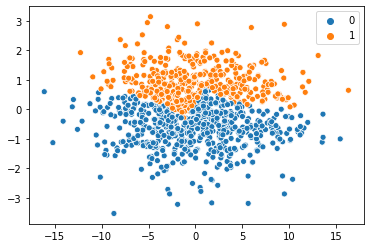

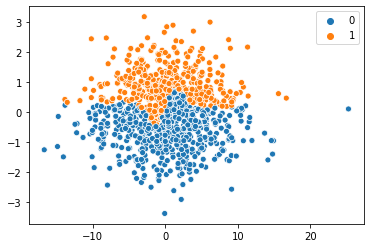

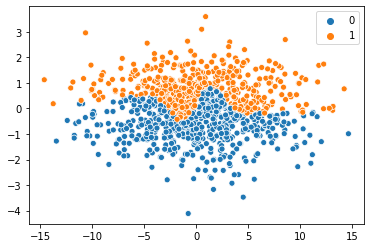

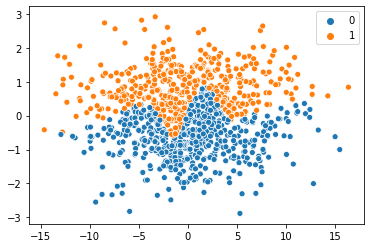

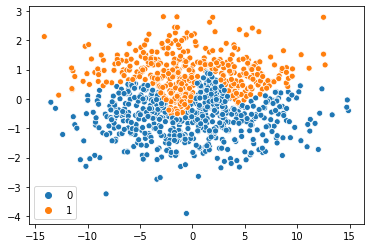

In [9]:
batch_size = 1000
n_epochs = 20
n_batches = 20
losses = []

epoch = 0


while epoch < n_epochs:
#for epoch in range(n_epochs):
    for _ in range(n_batches):
        # Zero the gradients
        optimizer.zero_grad()
        # Get the batch
        x_data, y_target = get_batch(batch_size)
        # Predict
        y_pred = clf(x_data, apply_softmax=False).squeeze()
        # Calculate loss
        loss = loss_func(y_pred, y_target)
        # Do backward propagation
        loss.backward()
        # Optimize one step
        optimizer.step()
        
    
    if epoch % 3 == 0:
        plt.figure()
        sns.scatterplot(x=x_data[:, 0].data.numpy(), y=x_data[:, 1].data.numpy(), 
                        hue=(y_pred > 0.5).data.numpy())
    epoch += 1